In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# import json
# from pandas import json_normalize

import datetime as dt

import geopandas as gpd
# from geopandas import GeoDataFrame

# from shapely.geometry import Point

# from openaq import OpenAQ

# from pyathena import connect

# from dotenv import load_dotenv 
# import os 

In [94]:
la_bounds_gdf = gpd.read_file("../../Data/Inputs/Boundary_Shapefile/la_mainland.geojson")

In [95]:
sensors_gdf = gpd.read_file('../../Data/Outputs/sensors.geojson')

In [96]:
sensors_gdf.set_index('sensors_id',inplace=True)

In [97]:
sensors_gdf.head()

,station_id,pollutant,name,datetime_first.utc,datetime_last.utc,timezone,is_mobile,is_monitor,bounds,country.id,...,country.name,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,instrument_name,instrument_id,geometry
sensors_id,,,,,,,,,,,,,,,,,,,,,
1502,847,PM2.5,South Long Beach,2016-03-06 20:00:00+00:00,2022-05-05 22:00:00+00:00,America/Los_Angeles,False,True,"[-118.175278, 33.792221, -118.175278, 33.792221]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,33.792221,-118.175278,Government Monitor,2,POINT (-118.17528 33.79222)
1837,1019,O₃,Pasadena,2016-03-06 20:00:00+00:00,2016-11-09 21:00:00+00:00,America/Los_Angeles,False,True,"[-118.1081, 34.0833, -118.1081, 34.0833]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.083300,-118.108100,Government Monitor,2,POINT (-118.1081 34.0833)
1866,1036,O₃,Pico Rivera,2016-03-06 20:00:00+00:00,2016-11-09 21:00:00+00:00,America/Los_Angeles,False,True,"[-118.059196, 34.0131, -118.059196, 34.0131]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.013100,-118.059196,Government Monitor,2,POINT (-118.0592 34.0131)
1876,1042,O₃,Piru - Pacific,2016-03-06 20:00:00+00:00,2020-06-10 21:00:00+00:00,America/Los_Angeles,False,True,"[-118.81, 34.4044, -118.81, 34.4044]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.404400,-118.810000,Government Monitor,2,POINT (-118.81 34.4044)
22301,1042,PM2.5,Piru - Pacific,2016-03-06 20:00:00+00:00,2020-06-10 21:00:00+00:00,America/Los_Angeles,False,True,"[-118.81, 34.4044, -118.81, 34.4044]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.404400,-118.810000,Government Monitor,2,POINT (-118.81 34.4044)


In [98]:
sensors_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1966 entries, 1502 to 14679598
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   station_id             1966 non-null   int32              
 1   pollutant              1966 non-null   object             
 2   name                   1966 non-null   object             
 3   datetime_first.utc     1966 non-null   datetime64[ms, UTC]
 4   datetime_last.utc      1966 non-null   datetime64[ms, UTC]
 5   timezone               1966 non-null   object             
 6   is_mobile              1966 non-null   bool               
 7   is_monitor             1966 non-null   bool               
 8   bounds                 1966 non-null   object             
 9   country.id             1966 non-null   int32              
 10  country.code           1966 non-null   object             
 11  country.name           1966 non-null   object 

In [136]:
sensors_gdf['pollutant'].unique()

13

### Oldest entries

The oldest data is from 2016

In [99]:
sensors_gdf.sort_values(by=['datetime_first.utc']).head()

,station_id,pollutant,name,datetime_first.utc,datetime_last.utc,timezone,is_mobile,is_monitor,bounds,country.id,...,country.name,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,instrument_name,instrument_id,geometry
sensors_id,,,,,,,,,,,,,,,,,,,,,
1502,847,PM2.5,South Long Beach,2016-03-06 20:00:00+00:00,2022-05-05 22:00:00+00:00,America/Los_Angeles,False,True,"[-118.175278, 33.792221, -118.175278, 33.792221]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,33.792221,-118.175278,Government Monitor,2,POINT (-118.17528 33.79222)
8683,1575,SO₂,Los Angeles - N. Mai,2016-03-06 20:00:00+00:00,2017-06-07 21:00:00+00:00,America/Los_Angeles,False,True,"[-118.2417, 34.0669, -118.2417, 34.0669]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.066900,-118.241700,Government Monitor,2,POINT (-118.2417 34.0669)
2794,1585,O₃,Upland,2016-03-06 20:00:00+00:00,2016-11-09 21:00:00+00:00,America/Los_Angeles,False,True,"[-117.6733, 34.0986, -117.6733, 34.0986]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.098600,-117.673300,Government Monitor,2,POINT (-117.6733 34.0986)
2793,1585,PM10,Upland,2016-03-06 20:00:00+00:00,2016-11-09 21:00:00+00:00,America/Los_Angeles,False,True,"[-117.6733, 34.0986, -117.6733, 34.0986]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.098600,-117.673300,Government Monitor,2,POINT (-117.6733 34.0986)
2792,1585,PM2.5,Upland,2016-03-06 20:00:00+00:00,2016-11-09 21:00:00+00:00,America/Los_Angeles,False,True,"[-117.6733, 34.0986, -117.6733, 34.0986]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.098600,-117.673300,Government Monitor,2,POINT (-117.6733 34.0986)


In [100]:
len(sensors_gdf.sort_values(by=['datetime_first.utc']))

1966

The oldest `PM2.5` entries are also from 2016

In [101]:
sensors_gdf[sensors_gdf['pollutant'] == 'PM2.5'].sort_values(by=['datetime_first.utc']).head()

,station_id,pollutant,name,datetime_first.utc,datetime_last.utc,timezone,is_mobile,is_monitor,bounds,country.id,...,country.name,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,instrument_name,instrument_id,geometry
sensors_id,,,,,,,,,,,,,,,,,,,,,
1502,847,PM2.5,South Long Beach,2016-03-06 20:00:00+00:00,2022-05-05 22:00:00+00:00,America/Los_Angeles,False,True,"[-118.175278, 33.792221, -118.175278, 33.792221]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,33.792221,-118.175278,Government Monitor,2,POINT (-118.17528 33.79222)
22301,1042,PM2.5,Piru - Pacific,2016-03-06 20:00:00+00:00,2020-06-10 21:00:00+00:00,America/Los_Angeles,False,True,"[-118.81, 34.4044, -118.81, 34.4044]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.404400,-118.810000,Government Monitor,2,POINT (-118.81 34.4044)
2150,1200,PM2.5,Glendora - Laurel,2016-03-06 20:00:00+00:00,2025-12-10 01:00:00+00:00,America/Los_Angeles,False,True,"[-117.85080000000002, 34.1439, -117.8508000000...",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.143900,-117.850800,Government Monitor,2,POINT (-117.8508 34.1439)
2775,1575,PM2.5,Los Angeles - N. Mai,2016-03-06 20:00:00+00:00,2017-06-07 21:00:00+00:00,America/Los_Angeles,False,True,"[-118.2417, 34.0669, -118.2417, 34.0669]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.066900,-118.241700,Government Monitor,2,POINT (-118.2417 34.0669)
2792,1585,PM2.5,Upland,2016-03-06 20:00:00+00:00,2016-11-09 21:00:00+00:00,America/Los_Angeles,False,True,"[-117.6733, 34.0986, -117.6733, 34.0986]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.098600,-117.673300,Government Monitor,2,POINT (-117.6733 34.0986)


In [102]:
sensors_gdf = sensors_gdf

## Complete temporal coverage

For the sake of simplicity, I will use "complete temporal coverage" to mean stations or sensors with a first entry in 2016 and a latest entry in the current year.

Even though I'm calling this complete temporal coverage, this alone doesn't show whether the station has an entry in 2017, 2018 . . . and in the case of `sensors_all_years_gdf`, it's only showing that there has been **any** entry in 2016 and 2025 - of any pollutant class. One Relative Humidity reading in 2016 and one PM1 reading in 2025 would show up as complete temporal coverage according to this initial check.

I want to map the distribution of stations which have a starting entry in 2016 and a most recent entry in the current year.

In [104]:
sensors_all_years_gdf = sensors_gdf[(sensors_gdf['datetime_first.utc'] > '2016') & (sensors_gdf['datetime_last.utc'] > str(dt.datetime.today().year))]

In [140]:
sensors_all_years_gdf.head(3)

,station_id,pollutant,name,datetime_first.utc,datetime_last.utc,timezone,is_mobile,is_monitor,bounds,country.id,...,country.name,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,instrument_name,instrument_id,geometry
sensors_id,,,,,,,,,,,,,,,,,,,,,
25500,1052,CO,Pomona,2016-03-06 20:00:00+00:00,2025-12-10 01:00:00+00:00,America/Los_Angeles,False,True,"[-117.7506, 34.0667, -117.7506, 34.0667]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.0667,-117.7506,Government Monitor,2,POINT (-117.7506 34.0667)
4272146,1052,NO,Pomona,2016-03-06 20:00:00+00:00,2025-12-10 01:00:00+00:00,America/Los_Angeles,False,True,"[-117.7506, 34.0667, -117.7506, 34.0667]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.0667,-117.7506,Government Monitor,2,POINT (-117.7506 34.0667)
25501,1052,NO₂,Pomona,2016-03-06 20:00:00+00:00,2025-12-10 01:00:00+00:00,America/Los_Angeles,False,True,"[-117.7506, 34.0667, -117.7506, 34.0667]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.0667,-117.7506,Government Monitor,2,POINT (-117.7506 34.0667)


In [106]:
len(sensors_all_years_gdf)

1665

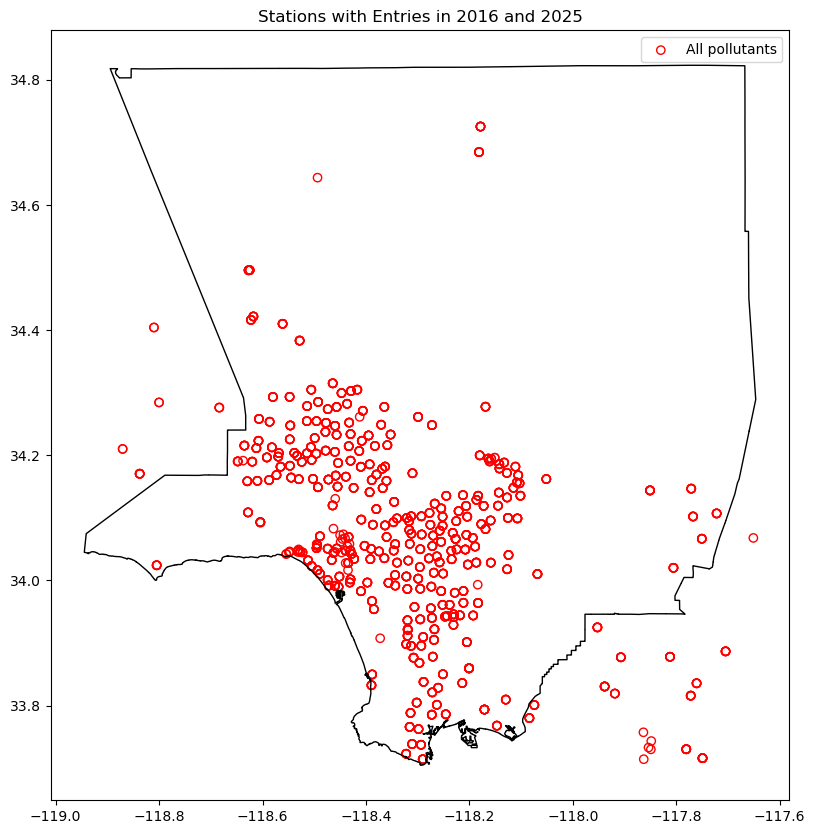

In [157]:
fig, ax = plt.subplots(figsize=(10, 10), label='Inline label');
sensors_all_years_gdf.plot(ax=ax, color='none', edgecolor='red',label='All pollutants');
la_bounds_gdf.plot(ax=ax, color='none', edgecolor='black');
ax.set_title(f"Stations with Entries in 2016 and {str(dt.datetime.today().year)}");
ax.legend(loc='best');

This map shows stations where the oldest entry is from 2016 and the most recent is from 2025 (or the notebook was ran) - these stations are good candidates for strong data coverage.

I will look at which pollutant classes have the most entries:

In [133]:
sensors_all_years_gdf['pollutant'].value_counts()

pollutant
PM2.5              341
PM1                278
Temperature (C)    273
PM10               237
Temperature (F)    194
RH                 150
PM0.3 count         79
NO₂                 45
NOx                 18
NO                  18
O₃                  17
CO                  13
SO₂                  2
Name: count, dtype: int64

## Spatial distribution of PM2.5

Since `PM2.5` has a strong presence, I will look into its spatial distribution, for stations with entries in 2016 and 2025:

In [108]:
sensors_all_years_pm25_gdf = sensors_gdf[(sensors_gdf['pollutant'] == 'PM2.5') & (sensors_gdf['datetime_first.utc'] > '2016') & (sensors_gdf['datetime_last.utc'] > str(dt.datetime.today().year))]

In [139]:
sensors_all_years_pm25_gdf.head(3)

,station_id,pollutant,name,datetime_first.utc,datetime_last.utc,timezone,is_mobile,is_monitor,bounds,country.id,...,country.name,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,instrument_name,instrument_id,geometry
sensors_id,,,,,,,,,,,,,,,,,,,,,
2150,1200,PM2.5,Glendora - Laurel,2016-03-06 20:00:00+00:00,2025-12-10 01:00:00+00:00,America/Los_Angeles,False,True,"[-117.85080000000002, 34.1439, -117.8508000000...",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.14390,-117.85080,Government Monitor,2,POINT (-117.8508 34.1439)
25551,1948,PM2.5,EBAM 11,2016-03-06 20:00:00+00:00,2025-12-10 01:00:00+00:00,America/Los_Angeles,False,True,"[-118.20502, 33.90144, -118.20502, 33.90144]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,33.90144,-118.20502,Government Monitor,2,POINT (-118.20502 33.90144)
3523,1989,PM2.5,Santa Clarita,2016-03-06 20:00:00+00:00,2025-12-10 01:00:00+00:00,America/Los_Angeles,False,True,"[-118.52829999999999, 34.3833, -118.5282999999...",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.38330,-118.52830,Government Monitor,2,POINT (-118.5283 34.3833)


To clarify, the length of this `PM2.5` dataframe being much smaller is not a cause for concern - because the original `sensors_all_years_gdf` has entries for each pollutant class, it will be far larger:

In [141]:
print(len(sensors_all_years_gdf))
print(len(sensors_all_years_pm25_gdf))

1665
341


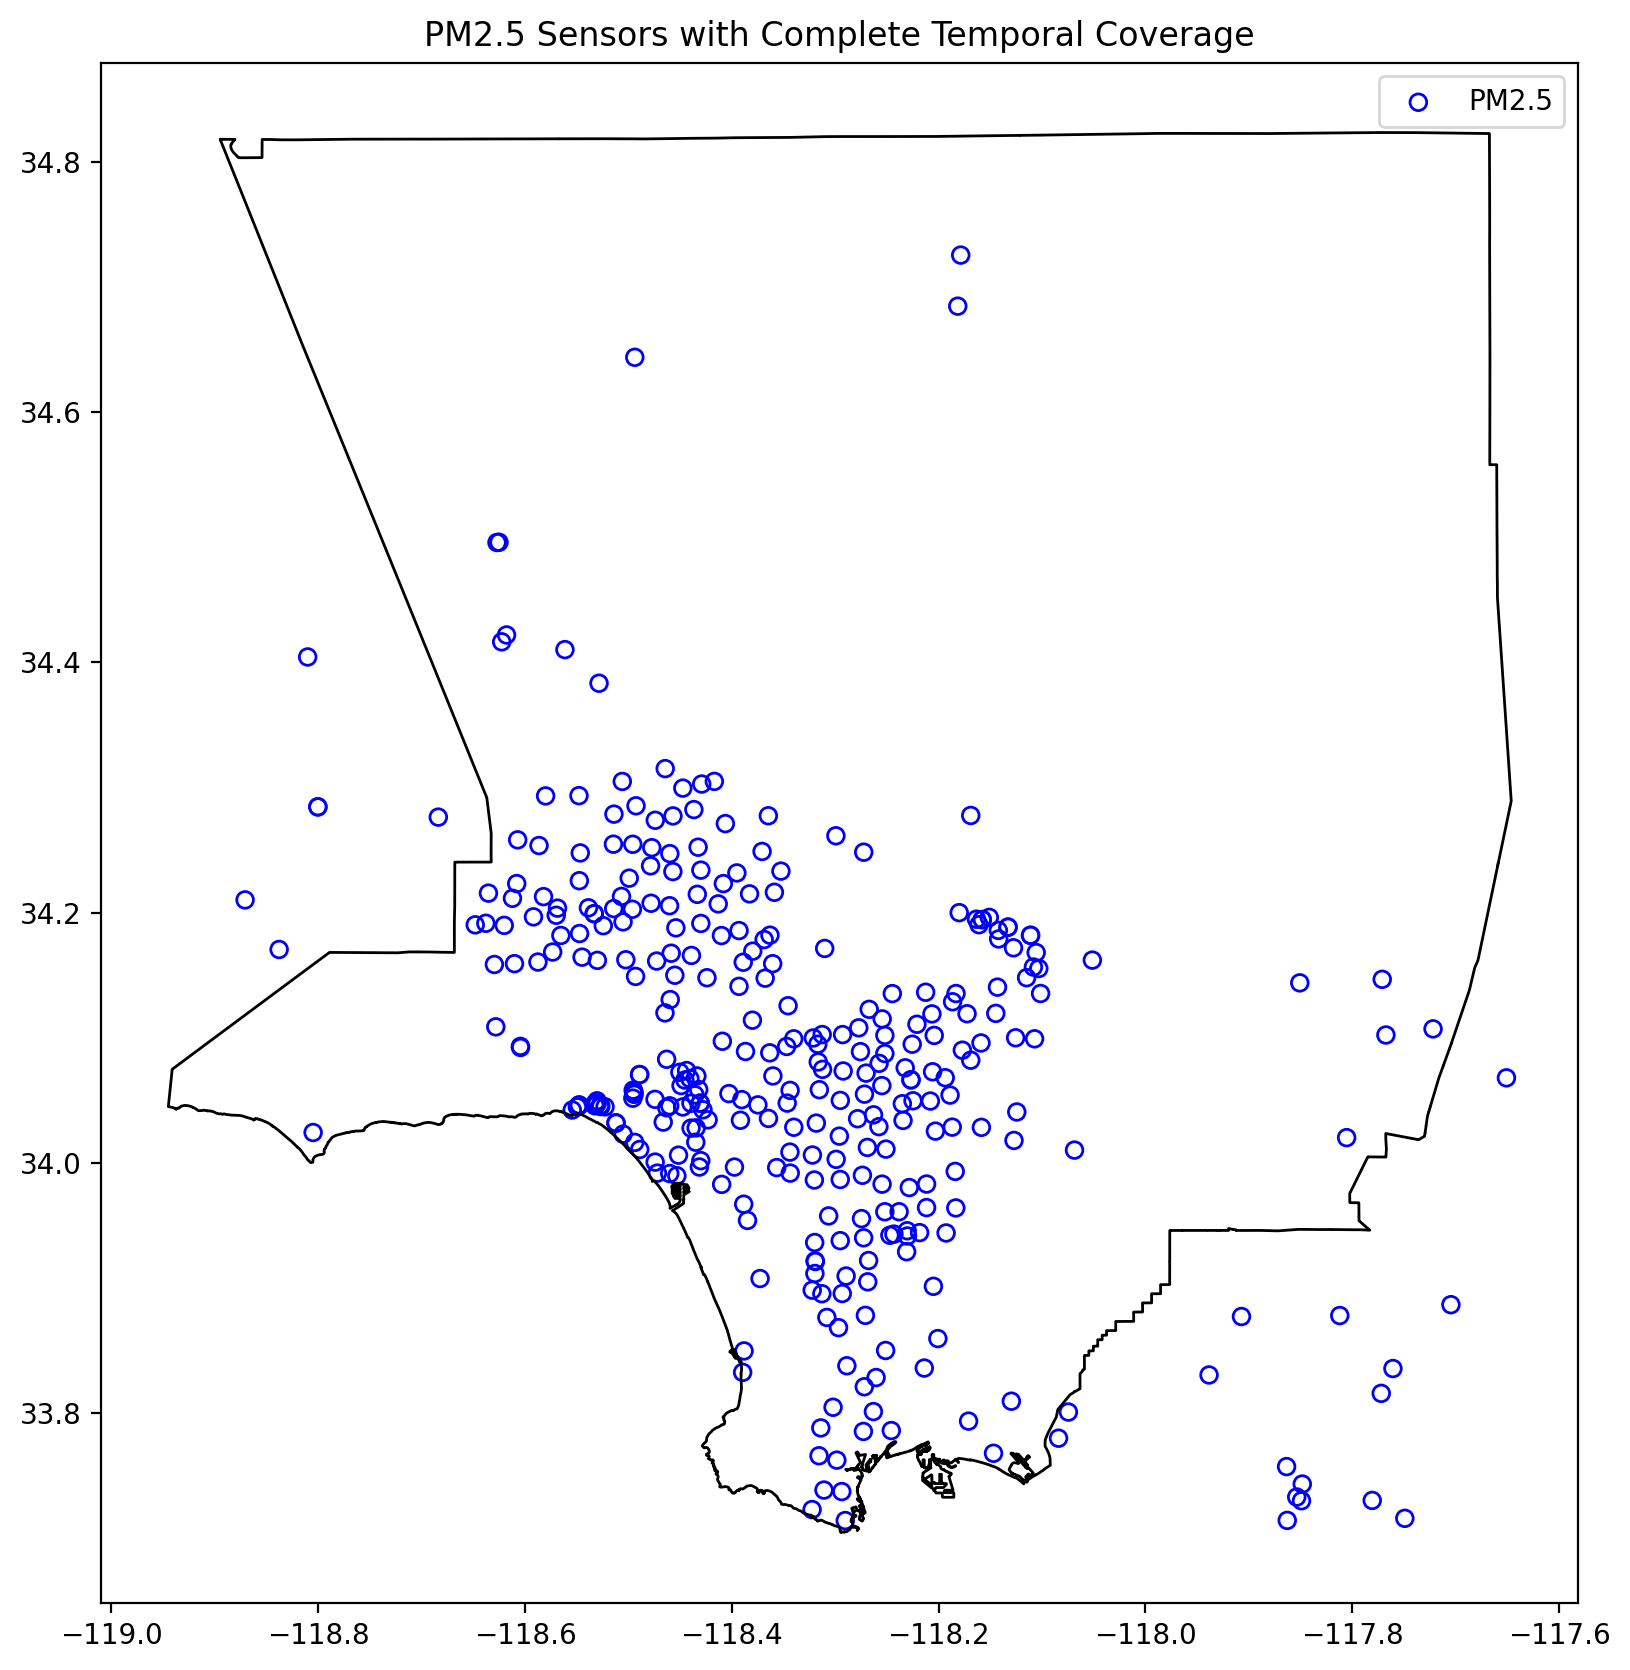

In [172]:
fig, ax = plt.subplots(figsize=(10,10), label='Inline label',dpi=200);
sensors_all_years_pm25_gdf.plot(ax=ax, color='none', edgecolor='blue',label='PM2.5');
la_bounds_gdf.plot(ax=ax, color='none', edgecolor='black');
ax.set_title("PM2.5 Sensors with Complete Temporal Coverage");
ax.legend(loc='best');

On a brief look, the coverage for just `PM2.5` is about as strong as the coverage for pollutants in general.

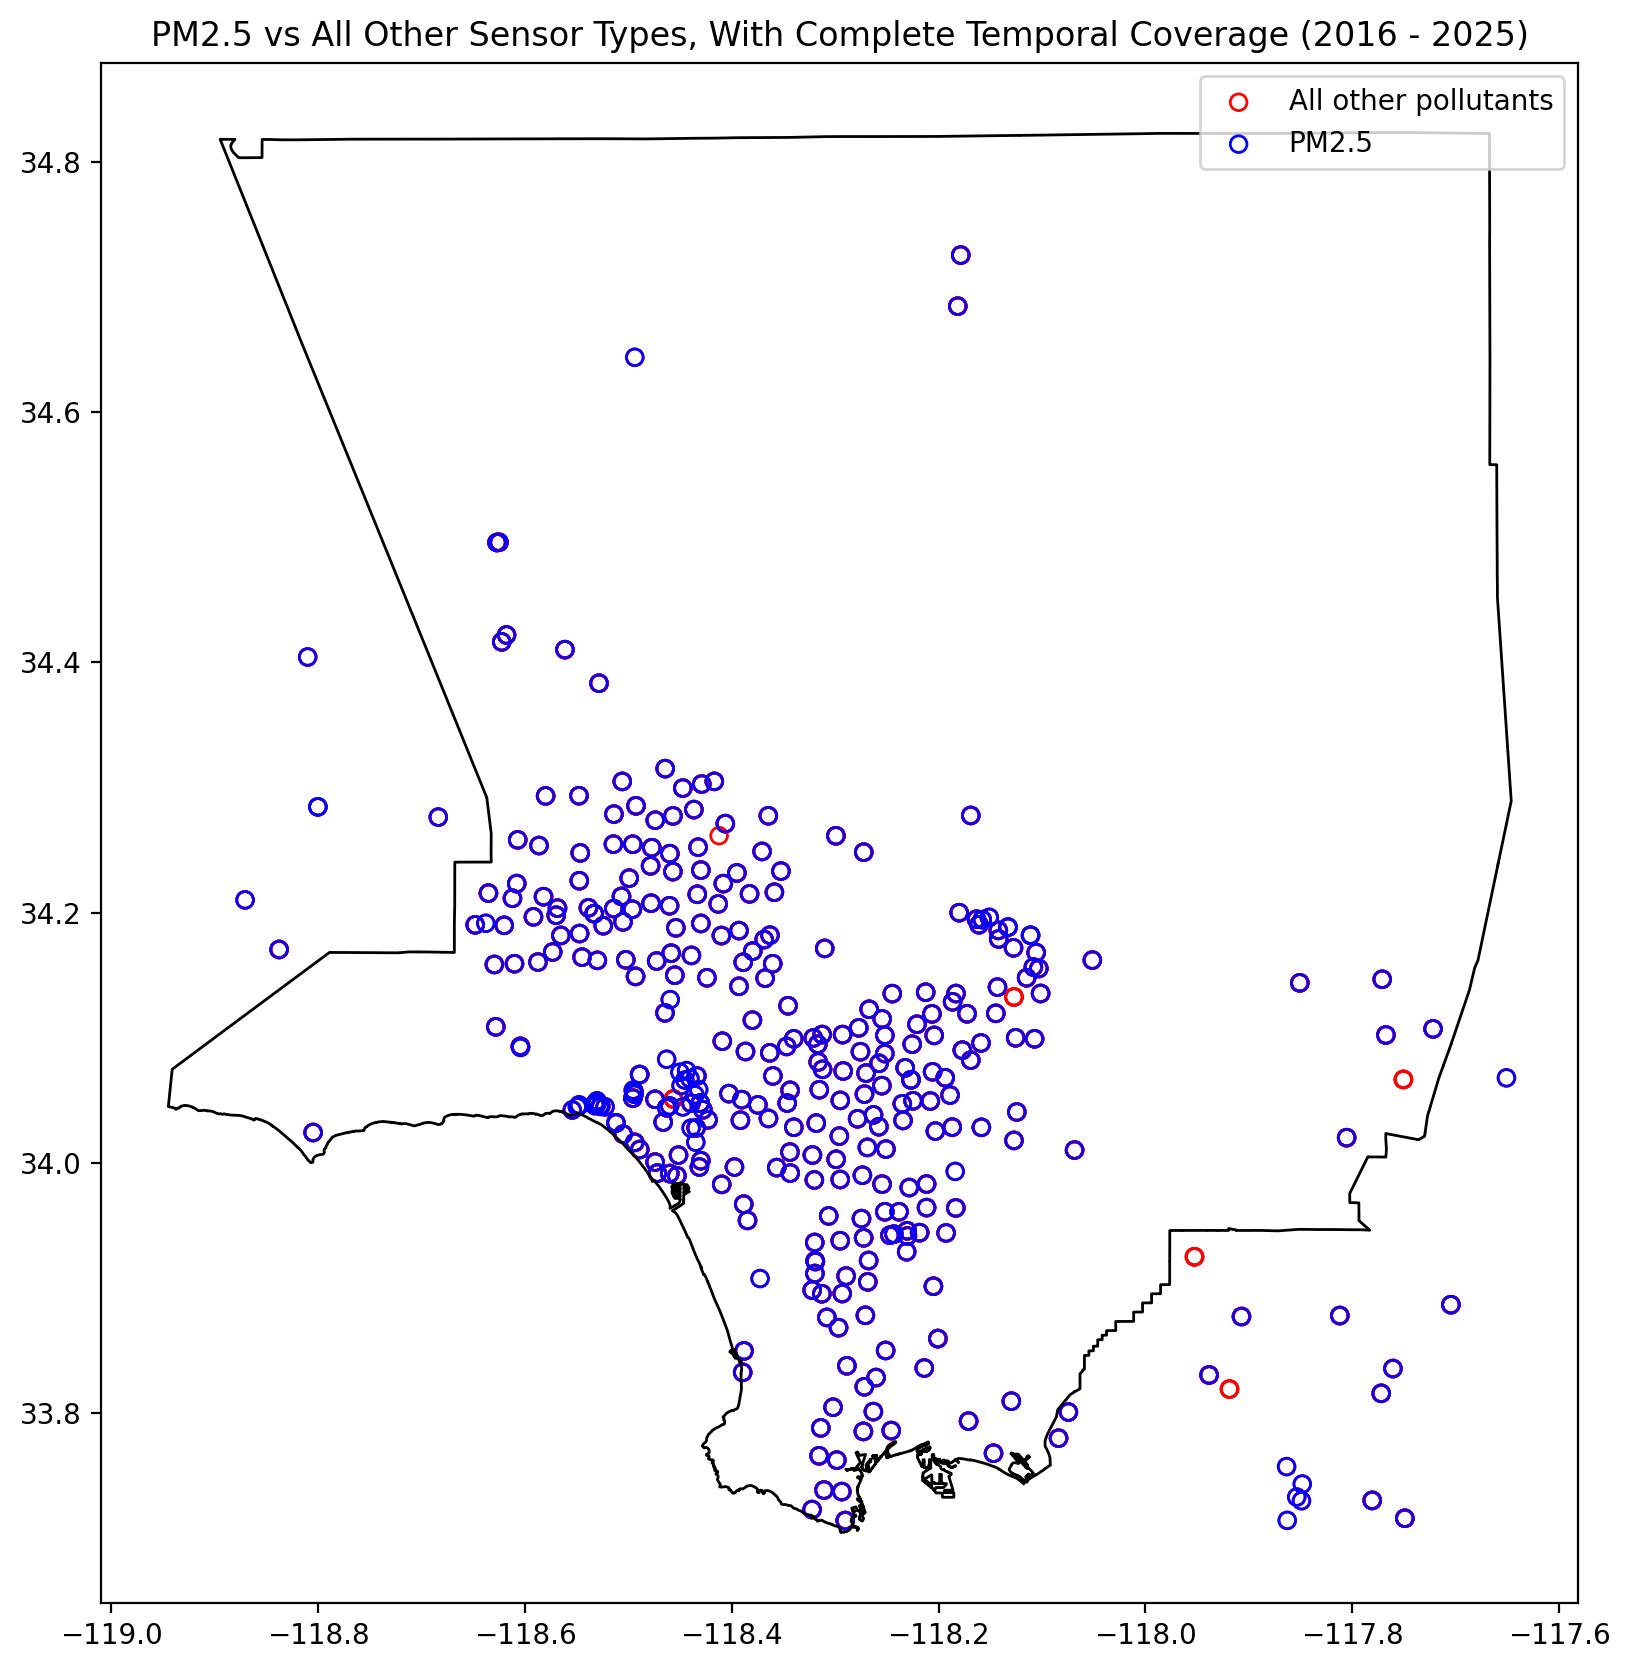

In [176]:
fig, ax = plt.subplots(figsize=(10,10), label='Inline label',dpi=200);
sensors_all_years_gdf.plot(ax=ax, color='none', edgecolor='red',label="All other pollutants");
sensors_all_years_pm25_gdf.plot(ax=ax, color='none', edgecolor='blue',label="PM2.5");
la_bounds_gdf.plot(ax=ax, color='none', edgecolor='black');
ax.set_title(f"PM2.5 vs All Other Sensor Types, With Complete Temporal Coverage (2016 - {str(dt.datetime.today().year)})");
ax.legend(loc='best');

Because `PM2.5` is plotted second, it is sitting on top. Stations in red have any entry in 2016 and 2025 - except `PM2.5`. Basically, we are losing out on these stations by specifically picking `PM2.5`.

The loss looks fairly minor. It is especially important that the two stations in the far North (Lancaster) are still here - we are keeping as much spatial coverage as possible.

In [144]:
sensors_all_years_gdf['pollutant'].value_counts()

pollutant
PM2.5              341
PM1                278
Temperature (C)    273
PM10               237
Temperature (F)    194
RH                 150
PM0.3 count         79
NO₂                 45
NOx                 18
NO                  18
O₃                  17
CO                  13
SO₂                  2
Name: count, dtype: int64

The next most popular class has significantly less data:

In [145]:
278/341

0.8152492668621701

`PM1` is only 80% as populated. In general, my plan is to use `PM2.5` as the target variable and only keep non-pollutant data types as predictors: `Temperature (C)` with temperature data converted from F, and `RH` (relative humidity)

In [177]:
def f_to_c(f):
    return (f - 32) * 5.0 / 9.0

In [113]:
sensors_all_years_gdf.to_file(r"../../Data/Outputs/sensors_all_years.geojson",driver="GeoJSON")

### Visualizing spatial/temporal coverage by pollutant class

I want to plot the spatial coverage of sensors with complete temporal coverage (entries from 2016 to present) to see whether one pollutant class has uniquely good coverage across LA county

In [114]:
sensors_all_years_gdf.head(2)

,station_id,pollutant,name,datetime_first.utc,datetime_last.utc,timezone,is_mobile,is_monitor,bounds,country.id,...,country.name,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,instrument_name,instrument_id,geometry
sensors_id,,,,,,,,,,,,,,,,,,,,,
25500,1052,CO,Pomona,2016-03-06 20:00:00+00:00,2025-12-10 01:00:00+00:00,America/Los_Angeles,False,True,"[-117.7506, 34.0667, -117.7506, 34.0667]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.0667,-117.7506,Government Monitor,2,POINT (-117.7506 34.0667)
4272146,1052,NO,Pomona,2016-03-06 20:00:00+00:00,2025-12-10 01:00:00+00:00,America/Los_Angeles,False,True,"[-117.7506, 34.0667, -117.7506, 34.0667]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.0667,-117.7506,Government Monitor,2,POINT (-117.7506 34.0667)


In [115]:
pollutant_classes = sensors_all_years_gdf['pollutant'].unique()

In [116]:
pollutant_classes

array(['CO', 'NO', 'NO₂', 'NOx', 'O₃', 'PM10', 'PM2.5', 'SO₂', 'PM1',
       'Temperature (C)', 'Temperature (F)', 'RH', 'PM0.3 count'],
      dtype=object)

In [117]:
len(pollutant_classes)

13

https://matplotlib.org/stable/gallery/color/named_colors.html

https://xkcd.com/color/rgb/

In [118]:
len(list(mcolors.TABLEAU_COLORS))

10

In [119]:
int(np.random.randint(0,len(list(mcolors.TABLEAU_COLORS))))

0

In [120]:
list(mcolors.TABLEAU_COLORS)[int(np.random.randint(0,len(list(mcolors.TABLEAU_COLORS))))]

'tab:green'

In [121]:
np.random.seed(42)
np.random.randint(0,2000)

1126

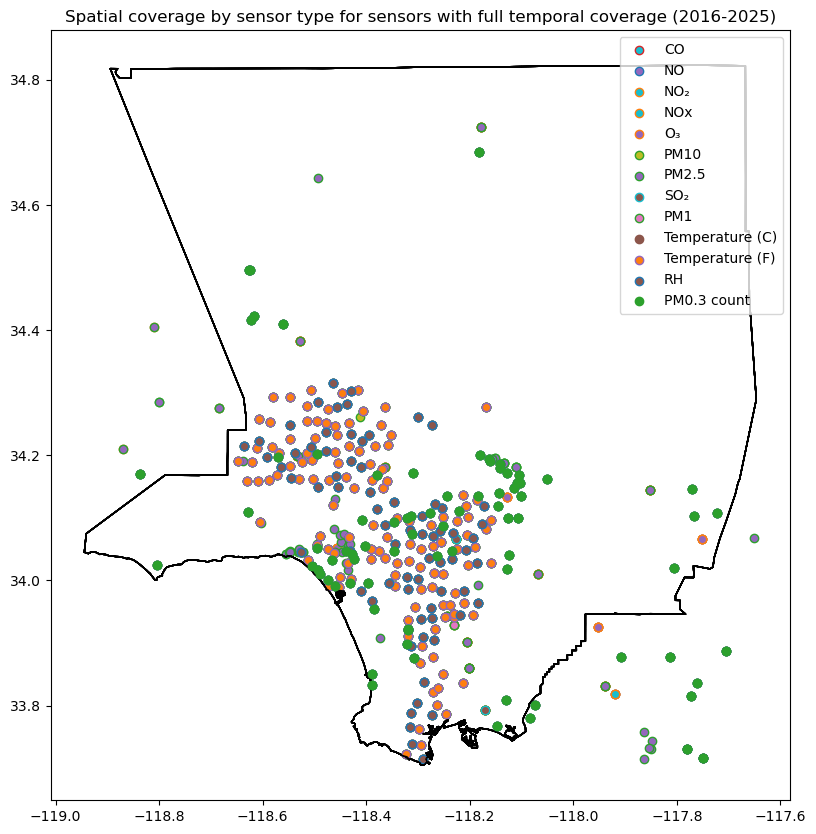

In [122]:
np.random.seed(6)
fig, ax = plt.subplots(figsize=(10, 10), label='Inline label');

for pollutant in list(pollutant_classes):
    la_bounds_gdf.plot(ax=ax, color='none', edgecolor='black');
    sensors_all_years_gdf[sensors_all_years_gdf['pollutant'] == pollutant].plot(ax=ax, color=list(mcolors.TABLEAU_COLORS)[int(np.random.randint(0,len(list(mcolors.TABLEAU_COLORS))))], 
                                                                                edgecolor=list(mcolors.TABLEAU_COLORS)[int(np.random.randint(0,len(list(mcolors.TABLEAU_COLORS))))], 
                                                                                label=pollutant);
ax.set_title('Spatial coverage by sensor type for sensors with full temporal coverage (2016-2025)');
ax.legend();

This plot shows the spatial coverage of sensors which have oldest readings starting in 2016 and latest readings in 2025, divided by sensor type (pollutant class being measured). The plotted points will be overlapped, but it's been plotted sequentially, i.e. a `PM2.5` point indicates that no subsequent pollutant types: `SO2`, `PM1` . . . are present. I will plot this again in ArcGIS and get something easier to interpret.

In [125]:
1/0

ZeroDivisionError: division by zero

In [ ]:
sensors_gdf['datetime_last.utc'] = pd.to_datetime(sensors_gdf['datetime_last.utc'])

In [ ]:
sensors_gdf.info()

In [ ]:
sensors_gdf['pollutant'] = [sensors_gdf.iloc[i]['sensors']['parameter']['display_name'] for i in range(len(sensors_gdf))]

In [ ]:
sensors_gdf['sensor_id'] = [sensors_gdf.iloc[i]['sensors']['id'] for i in range(len(sensors_gdf))]

In [ ]:
sensors_gdf.drop(columns=['sensors'],inplace=True)

In [ ]:
sensors_gdf.info()

In [ ]:
sensors_gdf = sensors_gdf.sort_values(by='datetime_last.utc')

In [ ]:
sensors_gdf.head()

In [ ]:
sensors_gdf[(sensors_gdf['pollutant'] == 'PM2.5') & (sensors_gdf['datetime_last.utc'] > '2025-01-01')]

https://docs.python.org/3/library/datetime.html#datetime.datetime.now

In [ ]:
today = dt.datetime.now(dt.timezone.utc)

In [ ]:
one_week_ago = today - dt.timedelta(weeks=1)

In [ ]:
active_pm2_5 = sensors_gdf[(sensors_gdf['pollutant'] == 'PM2.5') & (sensors_gdf['datetime_last.utc'] > one_week_ago)]

In [ ]:
active_pm2_5 = active_pm2_5.sort_values(by='datetime_last.utc')

In [ ]:
active_pm2_5.head()

In [ ]:
sensors_gdf[sensors_gdf['id'] == 3778909]

In [ ]:
active_pm2_5[active_pm2_5['sensor_id'] == 14152560]

In [ ]:
active_pm2_5[active_pm2_5['id'] == 3778909]

In [ ]:
active_pm2_5.info()

The `id` column can now be passed in to an Athena query

In [ ]:
station_IDs = list(active_pm2_5['id'])

In [ ]:
station_IDs[:10]

In [ ]:
sensor_IDs = list(active_pm2_5['sensor_id'])
print(sensor_IDs[:5])

In [ ]:
1/0